In [2]:
from PEPV import *
from compute_pe_truvada import *
from utils_avg_extinction_men import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\malin\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
df = pd.read_csv("tvfPercConcOver035.csv")
print(df)

   Unnamed: 0         0
0           0  0.379672
1           1  0.666623
2           2  0.862955
3           3  0.933241
4           4  0.976463
5           5  0.988870
6           6  0.999981


In [2]:
df_035 = [30.97981547619050,56.921959077381000,74.13786160714280,
          85.41745684523810,92.36096726190500,96.44264360119090,98.67986086309570]

df_001 = [58.10755877976190,83.71472767857150,93.01222767857160,
          96.99397247023840,98.6081287202387,99.43083928571490,99.896758928572]

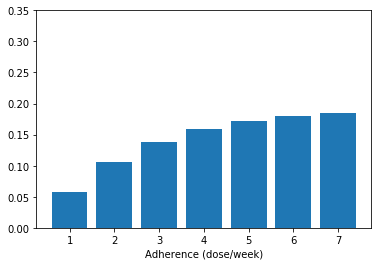

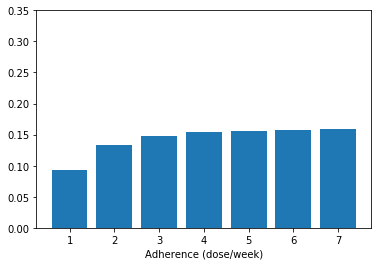

In [3]:
plt.bar(range(1,8), df_035/np.sum(df_035))
plt.xlabel('Adherence (dose/week)')
plt.ylim(0,0.35)
plt.show()

plt.bar(range(1,8), df_001/np.sum(df_001))
plt.xlabel('Adherence (dose/week)')
plt.ylim(0,0.35)
plt.show()

In [47]:
df_035 = pd.DataFrame(df_035)
df_035.to_csv('df_035.csv')

df_001 = pd.DataFrame(df_001)
df_001.to_csv('df_001.csv')
print(df_035)

           0
0  30.979815
1  56.921959
2  74.137862
3  85.417457
4  92.360967
5  96.442644
6  98.679861


[0.44597316 0.44738892 0.44880059 ... 0.         0.         0.        ]
(7, 322100)


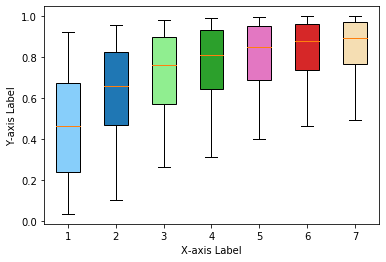

0.4610950501280302


In [9]:
combo = np.load('MSM/MSM/MSM_sim_boxplot/combo_1_7_downsampled.npy')
print(combo[0,:])
print(combo.shape)
combo_list = []
for i in range(7):
    combo_list.append(combo[i,:])
positions = range(1, 8)

colors = ['lightskyblue', 'tab:blue', 'lightgreen', 'tab:green', 'tab:pink', 'tab:red', 'wheat']
meanprops = dict(color="black",linewidth=1.5)
# Plot all box plots in one plot
boxes = plt.boxplot(combo_list, positions=positions, whis = [2.5, 97.5], showfliers=False, meanline=True, meanprops = meanprops, patch_artist=True)
for box, color in zip(boxes['boxes'], colors):
    box.set_facecolor(color)
    
for mean in boxes['means']:
    mean.set(color='black')

# Set x-axis ticks and labels
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

plt.xticks(positions, ['1', '2', '3', '4', '5', '6', '7'])
plt.show()
#plt.boxplot(combo[0,:], meanline=True, showmeans=True, meanprops={'color': 'black', 'linewidth': 2})

print(np.mean(combo[0,:]))

count = 0
for element in combo[0,:]:
    if element == 0:
        count += 1

In [15]:
def plot_box(hypothesis):
    hyp_list = []
    for i in range(7):
        hyp_list.append(hypothesis[i,:])
        #hyp_list.append(hypothesis[:,i])
    positions = range(1, 8)
    
    hyp_list = [value * 100 for value in hyp_list]

    colors = ['lightskyblue', 'tab:blue', 'lightgreen', 'tab:green', 'tab:pink', 'tab:red', 'wheat']
    meanprops = dict(color="black",linewidth=1.5)
    # Plot all box plots in one plot
    boxes = plt.boxplot(hyp_list, positions=positions, whis=[2.5, 97.5], showfliers=False, meanline=True, meanprops=meanprops, patch_artist=True)

    #for box, color in zip(boxes['boxes'], colors):
        #box.set_facecolor(color)

    for mean in boxes['means']:
        mean.set(color='black')
    # Plot all box plots in one plot
    boxes = plt.boxplot(hyp_list, positions=positions, whis = [2.5, 97.5], showfliers=False, meanline=True, meanprops = meanprops, patch_artist=True)
    #for box, color in zip(boxes['boxes'], colors):
        #box.set_facecolor(color)
    for box in boxes['boxes']:
        box.set_facecolor('lightskyblue')

    for mean in boxes['means']:
        mean.set(color='black')

    plt.axhline(y=50, color='red', linestyle='--', linewidth = 1)
    plt.axhline(y=90, color='darkred', linestyle='--', linewidth = 1)
    plt.ylim(0,105)
    # Set x-axis ticks and labels
    plt.xlabel('Dose/Week')
    plt.ylabel('Prophylactic Efficacy (%)')
    #plt.title()

    plt.xticks(positions, ['1', '2', '3', '4', '5', '6', '7'])
    plt.show()

(7, 322100)


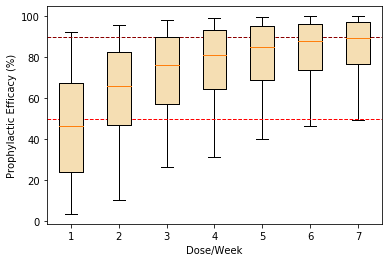

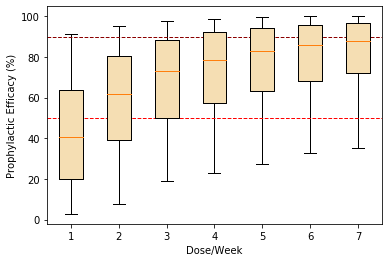

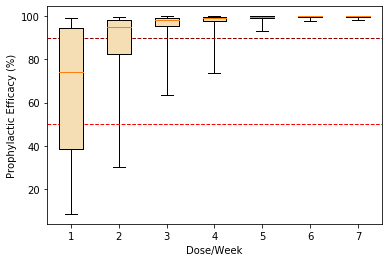

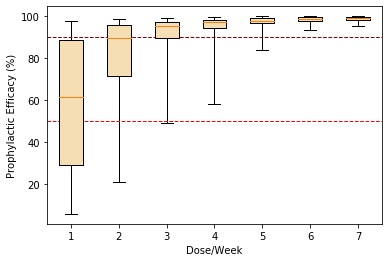

In [8]:
combo = np.load('MSM/MSM/MSM_sim_boxplot/combo_1_7_downsampled.npy')
local_pk = np.load('MSM/MSM/MSM_sim_boxplot/local_pk_1_7_downsampled.npy')
local_dntp = np.load('MSM/MSM/MSM_sim_boxplot/localdntp_1_7_downsampled.npy')
RAI = np.load('MSM/MSM/MSM_sim_boxplot/RAI_1_7_downsampled.npy')

print(combo.shape)
hypotheses = [combo, local_pk, local_dntp, RAI]
for hypothesis in hypotheses:
    plot_box(hypothesis)

[[0.00226176 0.01237453 0.24268744 ... 0.26875324 0.13447288 0.6887592 ]
 [0.05530003 0.19675502 0.52869915 ... 0.6013226  0.51905746 0.48605559]
 [0.01549916 0.07306501 0.6541325  ... 0.69306697 0.47428428 0.60229728]
 ...
 [0.00575163 0.08748482 0.51563148 ... 0.53501091 0.32876855 0.72098853]
 [0.02774335 0.44730275 0.66850626 ... 0.69260875 0.62210545 0.67321708]
 [0.0027626  0.16981647 0.46907884 ... 0.47976604 0.36211504 0.45252161]]
(144000, 7)


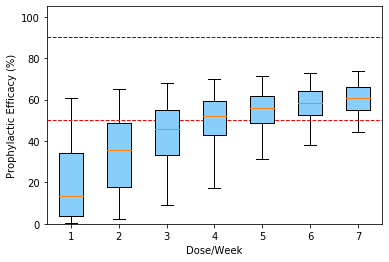

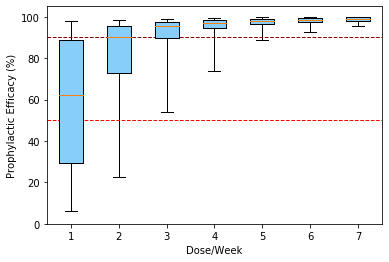

In [16]:
combo_rvi = np.load("phi_1110.npy")
print(combo_rvi)
print(combo_rvi.shape)
rvi = np.load("phi_1000.npy")
hypoth = [combo_rvi, rvi]

for hypo in hypoth:
    plot_box(hypo)

98.4129120248206
81.93224491099319
99.48004756078454


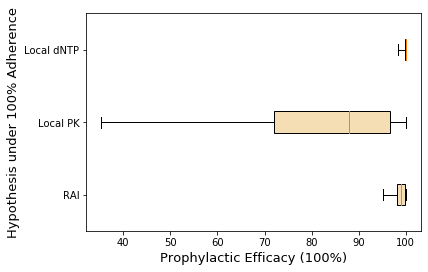

In [16]:
isolation = [RAI[6,:], local_pk[6,:],local_dntp[6,:]]
positions = range(1, 4)
colors =  ["violet", "lightpink", "rosybrown"]
meanprops = dict(color="black",linewidth=1.5)
isolation = [value*100 for value in isolation]
boxes = plt.boxplot(isolation, positions = positions, vert= False, whis = [2.5, 97.5], showfliers=False, meanline=True, meanprops = meanprops, patch_artist=True)
#for box, color in zip(boxes['boxes'], colors):
    #box.set_facecolor(color)
    
for box in boxes['boxes']:
    box.set_facecolor('wheat')
for iso in isolation:
    print(np.mean(iso))
plt.yticks(positions, ['RAI', 'Local PK', 'Local dNTP'])
plt.ylabel('Hypothesis under 100% Adherence', fontdict={'size': 13})
plt.xlabel('Prophylactic Efficacy (100%)', fontdict={'size': 13})
plt.show()


In [22]:
import random

def calculate_dist_p_value(inf_dist, inf_dist_hyp, hypothesis):
    
    # Define the mean and 95% confidence interval for hypothesis X (H0)
    # comparing the distribution overlap
    
    data = inf_dist_hyp
    mean_X = np.mean(data) 
    CI_X = np.quantile(data, (0.025, 0.975))
    print("Mean:", np.mean(data), "median", np.median(data), "95% quantile range: ", np.quantile(data, (0.025, 0.975)))

    p, infection = np.histogram(data, bins=np.unique(data), density=True)
    p_inf_dict = dict(zip(infection, p))
    print(p_inf_dict)
    
    keys1, values1 = np.array(list(inf_dist.keys())), np.array(list(inf_dist.values()))
    keys2, values2 = np.array(list(p_inf_dict.keys())), np.array(list(p_inf_dict.values()))

    width = 0.6
    plt.bar(keys1-width/2, values1, width, color = 'r', label = "drug detected")
    plt.bar(keys2+width/2, values2, width, color = 'g', label = f"{hypothesis}")
    plt.legend()
    plt.xlabel("Number of infected")
    plt.ylabel("probability")
    plt.show()
    
    num_simulations = 100000
    # this number of simualtions leads to small error bars/uncertainties
    

    # Function to generate random samples from normal distribution within specified confidence interval
    def generate_samples(prob_distribution, size):
        values = list(prob_distribution.keys())
        probabilities = list(prob_distribution.values())

        # Draw 100,000 values randomly according to the probability distribution
        random_values = random.choices(values, weights=probabilities, k=size)
        random_values = np.asarray(random_values)
        return random_values

    # Generate random samples for hypothesis X and clinical estimate
    # hypothesis X
    samples_X = generate_samples(p_inf_dict, num_simulations)
    # clinical estimate
    samples_clinical = generate_samples(inf_dist, num_simulations)
    
    print(samples_X[:100])
    print(samples_clinical[:100])
    # Calculate the proportion of simulation pairs where null hypothesis is true
    count = np.sum(samples_X <= samples_clinical)
    print(count)
    p_value = count / num_simulations

    print("P-value:", p_value)

    print("")
    print("----------------------------------------------------------")
    print("")

In [18]:
inf_dist_hptn083 = {31: 3e-05, 30: 6e-05, 29: 8e-05, 28: 0.00022, 27: 0.00032, 
                    26: 0.00065, 25: 0.00086, 24: 0.00149, 23: 0.00252, 22: 0.00317, 
                    21: 0.00533, 20: 0.00736, 19: 0.01049, 18: 0.01382, 17: 0.01699, 
                    16: 0.0212, 15: 0.02491, 14: 0.03016, 13: 0.03448, 12: 0.03913, 
                    11: 0.04276, 10: 0.04562, 9: 0.0484, 8: 0.05152, 7: 0.05221, 6: 0.05052, 
                    5: 0.05013, 4: 0.04957, 3: 0.0472, 2: 0.04503, 1: 0.04046, 0: 0.26330999999999993}

inf_dist_iprex = {28: 1e-05, 27: 3e-05, 26: 5e-05, 25: 0.00012, 24: 0.00019, 23: 0.00053, 
                  22: 0.00091, 21: 0.00106, 20: 0.00184, 19: 0.00314, 18: 0.00471, 
                  17: 0.00707, 16: 0.00965, 15: 0.01307, 14: 0.01587, 13: 0.02028, 
                  12: 0.02508, 11: 0.03009, 10: 0.03422, 9: 0.03782, 8: 0.04339, 
                  7: 0.04597, 6: 0.04948, 5: 0.05178, 4: 0.05193, 3: 0.05293, 2: 0.05155, 
                  1: 0.04863, 0: 0.39860000000000007}

inf_dist_ipergay = {2: 0.12422, 1: 0.19902, 0: 0.67676}

hptn083 = np.load("../HPTN083_vp.npy")
iprex = np.load("../iPrEx_vp.npy")
ipergay = np.load("../IPERGAY_vp.npy")

hypoth = [10001, 10101, 11001, 11101]

hptn083
Mean: 20.7801 median 20.0 95% quantile range:  [10. 34.]
{3: 5e-05, 5: 0.0004, 6: 0.001, 7: 0.0025, 8: 0.004, 9: 0.0059, 10: 0.0115, 11: 0.0192, 12: 0.0253, 13: 0.0323, 14: 0.0402, 15: 0.0477, 16: 0.0513, 17: 0.0609, 18: 0.0653, 19: 0.0676, 20: 0.0728, 21: 0.0695, 22: 0.0617, 23: 0.0616, 24: 0.048, 25: 0.0448, 26: 0.0438, 27: 0.0333, 28: 0.0273, 29: 0.0251, 30: 0.0169, 31: 0.0147, 32: 0.0112, 33: 0.0085, 34: 0.0076, 35: 0.0051, 36: 0.0041, 37: 0.0027, 38: 0.0018, 39: 0.0019, 40: 0.0005, 41: 0.0003, 42: 0.0005, 43: 0.0001, 44: 0.0001, 45: 0.00025, 47: 5e-05, 49: 0.0001, 50: 2.5e-05}


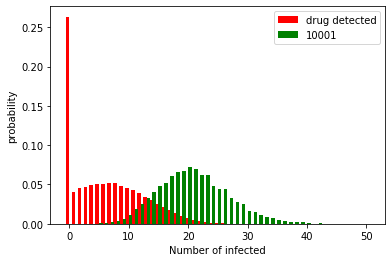

[35 20 13 22 22 13 32 23 20 23 20 23 24 15 17 21 45 18 22 17 40 15 17 23
 28 29  9 11 21 19 18 16 19 23 14 18 19 23 22 25  8 23 17 18 17 20 15 25
 16 27 23 23 18 17 16 21 14 26 22 18 29 22 13 24 23 27 33 15 26 25 16 33
 18 23 13 17 15 25 28 21 14 21 19 27 17 18 20 27 25 20 19 15 27 14 13 32
 16 19 20 21]
[ 4  0  6 11  9  0  8  0  0  0  0  5  4 13  1  3  0  2  8  3  5  9  0 20
  9  5 10 11 16  0 14  0 16 11 10  0 12  0  0  1  0  0  1 13  0 14  8  7
  7  6  9  1  0  2  9  6  3  9 20  0 14 12  9  4  0  3 18  5  0  8 13  9
  7  8 19  5  3  3 15  7  4 16  7 16 10 14  1  9  5  0 10  0  4 13  3  5
  5  1  8  7]
5280
P-value: 0.0528

----------------------------------------------------------

Mean: 14.6099 median 14.0 95% quantile range:  [ 7. 24.]
{2: 0.0001, 3: 0.0005, 4: 0.0026, 5: 0.0071, 6: 0.0134, 7: 0.0224, 8: 0.035, 9: 0.0462, 10: 0.0602, 11: 0.0732, 12: 0.0825, 13: 0.0922, 14: 0.0847, 15: 0.0809, 16: 0.0764, 17: 0.0694, 18: 0.0645, 19: 0.0444, 20: 0.0384, 21: 0.0324, 22: 0.021, 23: 0.

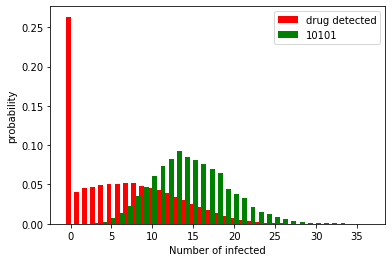

[12 13 19 12 21 14 21  9 14 11 20 11  7 20 16 14  8 20  9 14 14 13 18  8
 10  5 19 15 20 24 12 11 18  8 15 15 18  9 17  7 12 13 19  7 19 11 18 14
 13  4 17 15 12 24 17  9 19 12 12 10 14 18 18 23 12 14 20 15 33 25 21 12
 10 14  7 16 18 10 10 15 18 18 12 12 10 17 15 17 19 16 10  7 13 14  9 18
 15 21 19 17]
[ 0  8 11  8  1  5  2  8 15  8  0  0 16  5  0 18 12  7  4  0  9  0 13  6
 12 10  9 15 10  9  0  0 12 15 15  0 11  6  1  7  7 10  0 10  0  6  5  7
  8 12  7  0 12 11  9  5  5 13 18 10  0 11  0  0  0  0  6 13  4 10  0  6
  0 16 21 10 19 18  7  0  8  2  0  0  0  0  7 14  0  2 13  7  0  0  3 19
  0  9  2  1]
16195
P-value: 0.16195

----------------------------------------------------------

Mean: 61.6778 median 61.0 95% quantile range:  [38. 90.]
{21: 0.0001, 22: 5e-05, 24: 0.0002, 25: 0.0002, 26: 0.0003, 27: 0.0002, 28: 0.0004, 29: 0.0008, 30: 0.0008, 31: 0.0009, 32: 0.0017, 33: 0.0017, 34: 0.0032, 35: 0.0034, 36: 0.0034, 37: 0.0052, 38: 0.0065, 39: 0.006, 40: 0.0101, 41: 0.0084, 42: 0.01

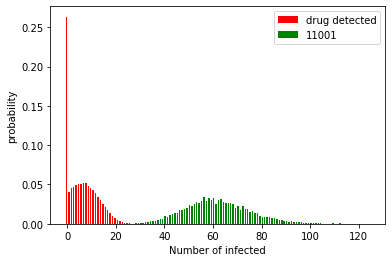

[58 56 52 63 56 58 64 57 59 82 47 74 69 64 69 74 57 62 62 37 64 51 71 54
 54 65 50 64 53 58 95 36 73 56 67 60 77 59 73 63 52 50 56 72 59 65 48 76
 59 62 66 55 42 32 51 56 57 99 73 87 74 48 53 58 56 59 81 65 93 65 48 65
 62 50 55 55 67 78 66 63 69 72 78 76 38 48 87 50 39 69 77 48 41 46 72 41
 73 40 49 95]
[16 12 11  0 10  0 15  0  0  0  9 17  0  0 14  0  7 13  5  8 11  0 10  0
  9 12 11  1  0  8  0  9  2  1  7 15  3 10  0  0  0 14  0  0  7  0  1  7
  0  8  0  9 17 12 16 10 10  0  6  3  4 14  7  0  3  5 11  3 15 13 18  0
 15  9  8 13  4 22 10  4  9  0  4  0  0  0  0  0  8 17  6 12  9  2 15  6
  0  1 13  6]
1
P-value: 1e-05

----------------------------------------------------------

Mean: 54.2307 median 54.0 95% quantile range:  [33. 80.]
{17: 0.0001, 18: 0.0001, 19: 0.0001, 21: 0.0002, 22: 0.0002, 23: 0.0002, 24: 0.0005, 25: 0.0006, 26: 0.001, 27: 0.0011, 28: 0.0016, 29: 0.0029, 30: 0.0038, 31: 0.0047, 32: 0.0056, 33: 0.0053, 34: 0.0083, 35: 0.0095, 36: 0.0111, 37: 0.0119, 38: 0.016, 39

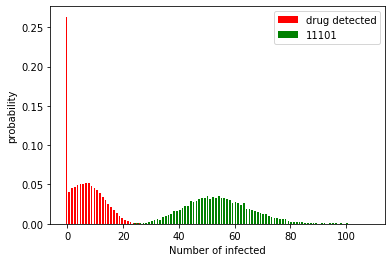

[60 47 40 38 60 70 39 58 45 44 46 46 52 77 46 64 51 72 49 45 62 51 60 57
 48 40 52 50 56 55 47 51 51 44 59 57 59 43 46 64 53 60 50 43 56 50 70 56
 65 46 54 37 43 55 54 37 34 45 61 53 57 61 37 39 40 86 79 51 56 75 63 32
 44 67 53 54 62 61 43 68 60 55 63 52 71 44 47 71 55 42 58 69 54 52 43 63
 70 51 57 63]
[11 11  9  4  5  0 15  7  8  2  8 11  0  4 12 10 12  0  8 19  2  1  0 13
  6  4  8 19  3  7  6  0  0  0  6  8 10  9  0  4 13  7  1 12  1 14  8 10
  3  0  4  7 22 11  6 19  0  0 18 16  6  5  8  1 17 11  0  9 10 16  6  5
  0  6  1  4  5 19  4  1 12  0  0 11 10 14  3 10  0  1  7 13  3 19  2 21
  0  0 16  7]
4
P-value: 4e-05

----------------------------------------------------------



In [23]:
print("hptn083")
for i in range(0,4):
    calculate_dist_p_value(inf_dist = inf_dist_hptn083, 
                      inf_dist_hyp = hptn083[i+1], hypothesis = hypoth[i])

ipergay
Mean: 1.9411 median 2.0 95% quantile range:  [0. 6.]
{0: 0.2262, 1: 0.2635, 2: 0.2036, 3: 0.1377, 4: 0.0786, 5: 0.0447, 6: 0.0214, 7: 0.0125, 8: 0.0066, 9: 0.0031, 10: 0.0012, 11: 0.0004, 12: 0.00025}


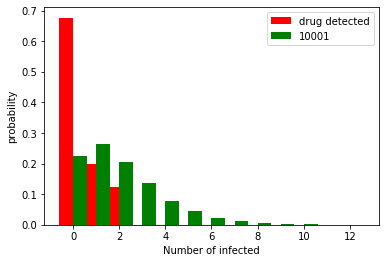

[3 2 2 1 2 6 1 5 5 1 1 5 2 0 6 0 0 1 3 3 0 4 2 0 4 3 0 3 2 1 2 2 3 2 2 2 2
 0 0 1 0 4 1 6 7 4 1 4 0 1 1 1 6 1 2 0 0 1 0 0 3 0 3 1 5 5 0 2 1 1 2 1 1 2
 0 0 1 0 1 0 1 2 4 3 2 1 1 0 1 3 2 3 0 1 1 2 1 0 2 0]
[2 0 1 0 1 0 2 2 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 2 0
 0 1 2 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 2 2 2 0 2 0 0 2 2 0 0 0 1 0 1 0 0 0
 2 0 1 0 0 0 0 0 0 0 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0]
33498
P-value: 0.33498

----------------------------------------------------------

Mean: 1.3523 median 1.0 95% quantile range:  [0. 5.]
{0: 0.3281, 1: 0.3022, 2: 0.191, 3: 0.0997, 4: 0.0465, 5: 0.0195, 6: 0.0082, 7: 0.0031, 8: 0.0012, 9: 0.0002, 10: 0.00015}


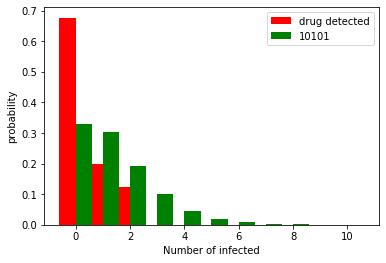

[6 2 3 1 2 1 1 2 1 4 2 2 0 0 2 1 2 1 3 2 1 3 1 6 0 3 1 2 0 0 0 1 3 0 1 0 3
 3 3 0 2 0 2 2 2 0 0 2 8 1 0 1 0 2 0 2 0 5 1 0 1 2 0 2 1 0 0 3 1 2 1 2 2 2
 1 0 4 1 0 2 0 2 1 0 1 0 1 0 1 0 1 0 1 1 1 2 1 0 2 2]
[0 2 0 1 2 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 2 0 0 1 0 0 0 2 0 1 0 1 1 2
 1 0 0 0 0 0 2 0 0 1 0 0 1 0 0 0 0 0 0 2 1 0 0 1 0 0 0 0 0 0 1 0 0 2 2 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
44903
P-value: 0.44903

----------------------------------------------------------

Mean: 5.4245 median 5.0 95% quantile range:  [ 0. 15.]
{0: 0.0438, 1: 0.0911, 2: 0.1117, 3: 0.1184, 4: 0.1139, 5: 0.1058, 6: 0.0899, 7: 0.0762, 8: 0.0618, 9: 0.0482, 10: 0.036, 11: 0.0276, 12: 0.0183, 13: 0.0172, 14: 0.0107, 15: 0.0081, 16: 0.0063, 17: 0.0038, 18: 0.0036, 19: 0.0023, 20: 0.0021, 21: 0.0007, 22: 0.0006, 23: 0.0008, 24: 0.0004, 25: 0.0002, 26: 6.666666666666666e-05, 29: 0.0001, 30: 0.0001}


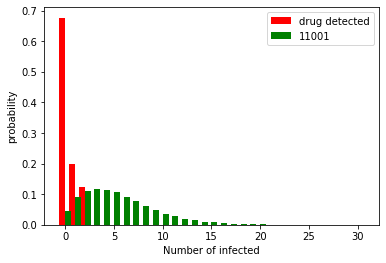

[ 5  9  2  2  6  0  2  9  7  7  2  4  1  4  5 10  4  3  3  4  2  3  2  5
  6  2  3  9  5  9  4  4  6  4  2  0  1 11  1 17  3  2 12  1  2  5  7 11
  6  3  5 16 18  4 10 10  9 10  4 10 15  1  3  4  6  5  6  4  3  1  3  4
  4  3  5  6  9 12  7  6  1  2  5  6  3 12  9  4  6  8  3  1  2  3 13  1
  6  2  0  4]
[0 0 0 0 0 1 1 1 0 0 1 0 2 0 2 1 0 0 2 0 0 0 2 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 2 0 2 0 1 1 0 1 0 2 0 0 2
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 2 1 2 0 1 0 2 0 0 2]
8745
P-value: 0.08745

----------------------------------------------------------

Mean: 4.8451 median 4.0 95% quantile range:  [ 0. 14.]
{0: 0.057, 1: 0.1025, 2: 0.1299, 3: 0.1321, 4: 0.1199, 5: 0.1058, 6: 0.0854, 7: 0.0696, 8: 0.0499, 9: 0.0425, 10: 0.0302, 11: 0.0209, 12: 0.0164, 13: 0.0116, 14: 0.0098, 15: 0.0052, 16: 0.0042, 17: 0.0019, 18: 0.0016, 19: 0.0015, 20: 0.001, 21: 0.0004, 22: 0.00015, 24: 0.0002, 25: 6.666666666666666e-05}


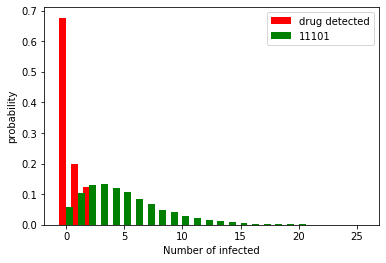

[ 1  3  3  5  6 18  2  2  0  7  3  1  8  0  5  2  5  2  1  2  2  2  9 14
 13  3  6  6  5  5  5 10  3  5  2  0  1  2  7 12  6  7 14  5  2  5  4  3
  7  9  5 12  5  3  2  5  8  8  6 10  3  1  1  5  0  6  4  4  3  1  9  4
 11  1  1  7  7 16  3  6  8  4  6  7 14  1  9  1  2  2  2  5  4 10  1 12
  9  6  3  4]
[0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 2 1 1 0 2 0 0 1 1 0 0 0 1 0 0 1 0 0
 1 2 0 0 2 0 0 2 0 0 0 0 2 0 0 1 0 1 0 0 2 0 0 1 0 2 0 0 0 1 2 0 0 2 2 0 0
 0 0 0 0 1 0 2 1 0 0 2 0 0 0 0 0 0 0 2 0 1 0 0 0 2 0]
10627
P-value: 0.10627

----------------------------------------------------------



In [24]:
print("ipergay")
for i in range(0,4):
    calculate_dist_p_value(inf_dist = inf_dist_ipergay, 
                      inf_dist_hyp = ipergay[i+1], hypothesis = hypoth[i])

iprex
Mean: 3.0312 median 3.0 95% quantile range:  [0. 7.]
{0: 0.057, 1: 0.1468, 2: 0.2218, 3: 0.219, 4: 0.1598, 5: 0.0979, 6: 0.0541, 7: 0.0266, 8: 0.0108, 9: 0.0046, 10: 0.0016}


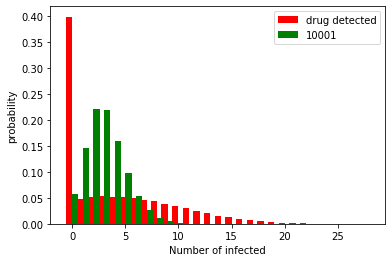

[1 3 2 1 3 4 4 5 8 2 2 4 4 1 4 1 2 6 3 2 1 0 5 3 2 3 1 3 3 5 1 3 7 2 1 4 4
 3 5 1 2 4 4 7 3 4 2 3 2 4 1 3 1 4 0 7 5 2 4 2 8 8 1 1 5 6 5 1 7 2 1 0 5 3
 0 3 5 4 2 2 4 3 0 3 4 5 3 7 0 6 3 3 5 3 2 3 2 4 4 3]
[ 4  4 10  8  0  0  7  0  0  0  2  4  1  8  0  8  6  1  0  0  3  0  7  0
 22 12  2 19 10  0  6  0  0  0  0  0  7  0 16  0  3 13  4  3  0  9  0  0
  0  2  0 12 15 11  5 11  0  5  0  0  1  0  0  7  1  0  8  9  0  8  0  0
 12  7  0  0  0  3  7  8  5  0 11  0  0 15  5  6  1  2  8  9  5  1  0  0
  9 12  0  0]
51783
P-value: 0.51783

----------------------------------------------------------

Mean: 1.9745 median 2.0 95% quantile range:  [0. 5.]
{0: 0.1466, 1: 0.2758, 2: 0.259, 3: 0.1756, 4: 0.0874, 5: 0.0373, 6: 0.0124, 7: 0.0045, 8: 0.0009, 9: 0.00025}


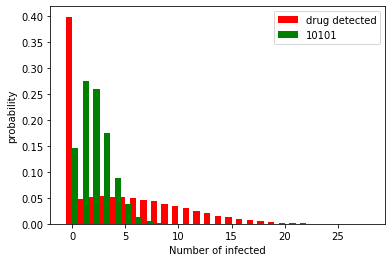

[2 2 6 3 1 3 2 3 1 1 1 3 2 2 3 4 3 1 1 4 1 0 0 4 2 1 1 3 0 0 3 2 1 2 3 2 3
 0 1 0 3 2 1 4 1 2 3 1 6 2 6 0 2 2 2 1 0 1 3 3 1 1 1 3 0 2 0 4 1 1 0 2 1 2
 1 2 1 0 4 2 4 3 1 0 4 3 2 1 0 3 2 3 1 1 1 1 1 3 0 3]
[ 0  6  0  0  4  0  7  2  0  5  0  5  1 10  0 12 11  6  0  6  6  3 10 12
  0  0  4  0  0 14 10 11  0  0  0  0  0  9  0  3 19  0  8  2 18  2  5  0
  4  2 15 10  0  9  0  9 12  0  3 13  1  0  0  0  0  9 12  9 14  3  0  5
  4  1  2 11 14  8  0 19  0  0 18  4  2  2  5  4  8  2  4  0  0  4  9 14
  2  0  0  3]
60390
P-value: 0.6039

----------------------------------------------------------

Mean: 9.7401 median 9.0 95% quantile range:  [ 4. 17.]
{0: 0.0003, 1: 0.0013, 2: 0.0059, 3: 0.0158, 4: 0.0321, 5: 0.0504, 6: 0.0763, 7: 0.0946, 8: 0.1134, 9: 0.1136, 10: 0.1055, 11: 0.1013, 12: 0.0815, 13: 0.064, 14: 0.0458, 15: 0.0342, 16: 0.0248, 17: 0.0167, 18: 0.0087, 19: 0.0064, 20: 0.0027, 21: 0.003, 22: 0.0007, 23: 0.0003, 24: 0.0001, 25: 0.0004, 26: 6.666666666666666e-05}


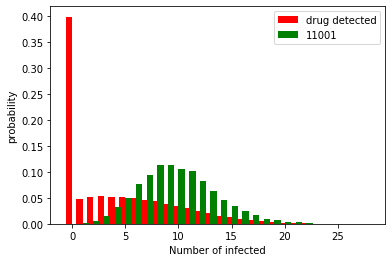

[ 5 15  3 11  7 10  7 18  7  7  6 12 12  4  6 18  7  9  3 12  6  5 10 14
 11 11 13  8 11  9 13  8  1  9  8 14  7 12 10  4 14 12 11  8 12  4 13 15
 16 12 10  8  7  5 10  8  9 17 13  6 13  9 10 16 10 12 17  6 15  5  9  7
  3 18 19  9  8 13  6 12 10 10  6 13  3 11 11 15  6 11  9 13  8  6 11  7
 18  5 10 14]
[ 2  4  0  3  5  4  4  6  1  7 12  9 14  7  5  0  0  2  0  0 10  9  0  5
  5  9  0  4  3  0  2  3 18  4  0  0  0  8  9  0  0  1 11  7  6 17 13  0
  0  1  8  0  0  3  8  4  0  0  2  3 10 17  0  2  8  0 11  0  0  7  0 15
  2  5  9  0  8  2  0  6  0  8 15  6  3  3  0 11  0 10  5  7  5  0  8  3
  0  3  0  0]
20134
P-value: 0.20134

----------------------------------------------------------

Mean: 8.4836 median 8.0 95% quantile range:  [ 3. 16.]
{0: 0.0002, 1: 0.004, 2: 0.0131, 3: 0.0305, 4: 0.0552, 5: 0.0754, 6: 0.1075, 7: 0.1212, 8: 0.1234, 9: 0.1173, 10: 0.1036, 11: 0.0727, 12: 0.0613, 13: 0.0422, 14: 0.0297, 15: 0.0172, 16: 0.0126, 17: 0.0058, 18: 0.0036, 19: 0.0018, 20: 0.0011, 21: 0.0

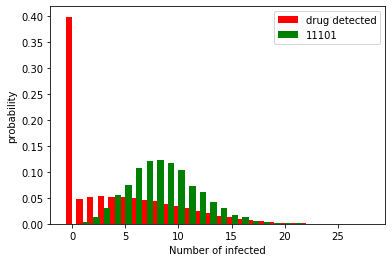

[ 5  5  6  8  4 11  2  9  6  9  9 11  8 12  6  6  8 10  8 11  9  5 16 10
  4  8 14  6  6  5 10  9 13  6  8  8  7  5  9 12  8  4  2  5 13  5 13 14
  6  7 13  3  6  5 13  8 14  6  8  6  8  9  5  3  8  9 13 12 11  9  9  5
 11  7  7  7  3 11 12  9  9 13 10 13  8 10 10  8  4 19  6  7 12  1 10 10
 13 11 17  7]
[ 3  6  0  1  0  0  4  7  0  0  9  0  0  5  5  7  0  0 12 16  2 10  0  3
  2  0  0  0  7  0  1  7  5  2  6 14 20  7  0  3 10  0 14  9  0  8 14  0
  0  0  0 13  4  1  1  4  4  6  0  4  0  0  0  0  7  3  0  9 10 10  0  0
  0  8  0  8  0  8  3  0 10  0 12  0  2  9  6  7  0  9  0  3  7  0  9 10
  0 11  0  7]
24800
P-value: 0.248

----------------------------------------------------------



In [25]:
print("iprex")
for i in range(0,4):
    calculate_dist_p_value(inf_dist = inf_dist_iprex, 
                      inf_dist_hyp = iprex[i+1], hypothesis = hypoth[i])